# Descripción y preparación del dataset

> a) Construya un dataframe con los datos a analizar descargando los datos desde la URL local [5]. Determine
cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de
pruebas.

In [4]:
import urllib
import pandas as pd

train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")

rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])

rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])

print train_df.shape
print test_df.shape

(3554, 2)
(3554, 2)


In [5]:
print("El conjunto de entrenamiento posee:")
print str(train_df.loc[train_df['Sentiment'] == 1].count()[1]) + " registro etiquetados con 1 es decir comentarios positivos"
print str(train_df.loc[train_df['Sentiment'] == -1].count()[1]) + " registro etiquetados con -1 es decir comentarios negativos"

print("\nEl conjunto de prueba posee:")
print str(test_df.loc[test_df['Sentiment'] == 1].count()[1]) + " registro etiquetados con 1 es decir comentarios positivos"
print str(test_df.loc[test_df['Sentiment'] == -1].count()[1]) + " registro etiquetados con -1 es decir comentarios negativos"

El conjunto de entrenamiento posee:
1770 registro etiquetados con 1 es decir comentarios positivos
1784 registro etiquetados con -1 es decir comentarios negativos

El conjunto de prueba posee:
1751 registro etiquetados con 1 es decir comentarios positivos
1803 registro etiquetados con -1 es decir comentarios negativos


Como se menciona en el cuadro anterior, el conjunto de entrenamiento tiene $1770$ registros correspondientes a la clase *Positivos* y $1784$ a la clase *Negativos*. Por su parte el conjunto de prueba posee $1751$ registros correspondientes a la clase *Positivos* y $1803$ a la clase *Negativos*.

# Extracción de palabras

> b) Construya una función, denominada *word_extractor*, que devuelva una lista de las palabras contenidas en
un determinado un trozo de texto. Incorpore en su función las operaciones de ***lower-casing*** y ***stemming*** (se omite *stopwords*).
Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con
los resultados obtenidos si no se hace stemming.

In [6]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer

def word_extractor(text, stop_words = True, use_stemmer = True):
   
    text = text.lower()
    text = re.sub(r'([a-z])\1+', r'\1\1',text)#substitute multiple letter by two
    words = ""
    wordtokens = word_tokenize(text.decode('utf-8','ignore'))
    
    if use_stemmer:
        stemmer = PorterStemmer()
        wordtokens = [ stemmer.stem(word) for word in wordtokens ]
        
    commonwords = set()
    
    if stop_words:
        commonwords = stopwords.words('english')
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    
    return words
    

print("\nUsando el Stemmer:")   
print word_extractor("I love to eat cake", stop_words = False)
print word_extractor("I love eating cake", stop_words = False)
print word_extractor("I loved eating the cake", stop_words = False)
print word_extractor("I do not love eating cake", stop_words = False)
print word_extractor("I don't love eating cake", stop_words = False)
print word_extractor("Abaci is a calculating tool that was in use in Europe", stop_words = False)

print("\nSin Usar el Stemmer:")   
print word_extractor("I love to eat cake", stop_words = False, use_stemmer = False)
print word_extractor("I love eating cake", stop_words = False, use_stemmer = False)
print word_extractor("I loved eating the cake", stop_words = False, use_stemmer = False)
print word_extractor("I do not love eating cake", stop_words = False, use_stemmer = False)
print word_extractor("I don't love eating cake", stop_words = False, use_stemmer = False)
print word_extractor("Abaci is a calculating tool that was in use in Europe", stop_words = False, use_stemmer = False)


Usando el Stemmer:
 i love to eat cake
 i love eat cake
 i love eat the cake
 i do not love eat cake
 i do n't love eat cake
 abaci is a calcul tool that wa in use in europ

Sin Usar el Stemmer:
 i love to eat cake
 i love eating cake
 i loved eating the cake
 i do not love eating cake
 i do n't love eating cake
 abaci is a calculating tool that was in use in europe


Observamos que el Stemmer convierte los verbos contenidos en las frases a sus formas infinitivas, tal y como es el caso de *love* o *eat* y sus respectivas conjugaciones, sin embargo otros verbos tales como *calculating* son degenerados a palabras que no existen dentro del idioma ingles, como por ejemplo *calcul*, por su parte los sustantivos tales como *cake* o *abici* no se ven modificados, mientras que otros como *europe* son degenerados a palabras que no existen dentro del lenguaje como *europ* en el ejemplo anteriormente mencionado. Es importante mencionar que *stopwords* eliminara los conectores y verbos auxiliares dentro de la oración, este comportamiento se presenta a continuación.

In [7]:
print("\nUsando el Stemmer con stopwords:")   
print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")
print word_extractor("Abaci is a calculating tool that was in use in Europe")


Usando el Stemmer con stopwords:
 love eat cake
 love eat cake
 love eat cake
 love eat cake
 n't love eat cake
 abaci calcul tool wa use europ


> c) Construya una función, denominada *word_extractor2*, análoga a la función anterior, pero que *lematice*
las palabras en vez de hacer *stemming*. Pruebe la función con las frases sugeridas en el código anterior
y discuta las diferencias que observa.

In [8]:
def word_extractor2(text, stop_words = True, use_lemmatizer = True):
    
    text = text.lower()
    text = re.sub(r'([a-z])\1+', r'\1\1', text)#substitute multiple letter by two
    words = ""
    wordtokens = word_tokenize(text.decode('utf-8','ignore'))
  
    
    if use_lemmatizer:
        wordlemmatizer = WordNetLemmatizer()
        wordtokens = [ wordlemmatizer.lemmatize(word.lower())\
        for word in wordtokens ]
    
    commonwords = set()
    
    if stop_words:
        commonwords = stopwords.words('english')
    
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

print("\nUsando el Lemmatizer:")   
print word_extractor2("I love to eat cake", stop_words = False)
print word_extractor2("I love eating cake", stop_words = False)
print word_extractor2("I loved eating the cake", stop_words = False)
print word_extractor2("I do not love eating cake", stop_words = False)
print word_extractor2("I don't love eating cake", stop_words = False)
print word_extractor2("Abaci is a calculating tool that was in use in Europe", stop_words = False)

print("\nSin Usar el Lemmatizer:")   
print word_extractor2("I love to eat cake", stop_words = False, use_lemmatizer = False)
print word_extractor2("I love eating cake", stop_words = False, use_lemmatizer = False)
print word_extractor2("I loved eating the cake", stop_words = False, use_lemmatizer = False)
print word_extractor2("I do not love eating cake", stop_words = False, use_lemmatizer = False)
print word_extractor2("I don't love eating cake", stop_words = False, use_lemmatizer = False)
print word_extractor2("Abaci is a calculating tool that was in use in Europe", stop_words = False, use_lemmatizer = False)


Usando el Lemmatizer:
 i love to eat cake
 i love eating cake
 i loved eating the cake
 i do not love eating cake
 i do n't love eating cake
 abacus is a calculating tool that wa in use in europe

Sin Usar el Lemmatizer:
 i love to eat cake
 i love eating cake
 i loved eating the cake
 i do not love eating cake
 i do n't love eating cake
 abaci is a calculating tool that was in use in europe


Observamos que el Lemmatizer a diferencia del Stemmer no modifica las conjugaciones de los verbos, sin embargo sustantivos como *abaci* fueron modificados por su forma mas "formal" dentro del idioma ingles, tal y como es el caso de *abacus*, ademas verbos auxiliares como *was* fueron degenerados a formas no existentes dentro del lenguaje tal es el caso de *wa*. Es importante mencionar que *stopwords* eliminara los conectores y verbos auxiliares dentro de la oración, este comportamiento se presenta a continuación.

In [9]:
print("Usando el Lemmatizer con Stopwords:")    
print word_extractor2("I love to eat cake")
print word_extractor2("I love eating cake")
print word_extractor2("I loved eating the cake")
print word_extractor2("I do not love eating cake")
print word_extractor2("I don't love eating cake")
print word_extractor2("Abaci is a calculating tool that was in use in Europe")

Usando el Lemmatizer con Stopwords:
 love eat cake
 love eating cake
 loved eating cake
 love eating cake
 n't love eating cake
 abacus calculating tool wa use europe


# Representación para aprendizaje

> d) Utilizando la función *CountVectorizer* de la librería <code>sklearn</code> y de acuerdo a las directrices mencionadas
en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que
usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras
más frecuentes en el conjunto de entrenamiento y pruebas.

In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def vectors(train, test, extractor, stop_words = True, vector = False):
    
    if extractor.lower() == "stemmer":
        texts_train = [word_extractor(text, stop_words) for text in train.Text]
        texts_test = [word_extractor(text, stop_words) for text in test.Text]
    
    elif extractor.lower() == "lemmatizer":
        texts_train = [word_extractor2(text, stop_words) for text in train.Text]
        texts_test = [word_extractor2(text, stop_words) for text in test.Text]
        
    else:
        print "warning: invalid extractor"
        return
    
    vectorizer = CountVectorizer(ngram_range=(1, 1), binary="False")
    vectorizer.fit(np.asarray(texts_train))
    
    features_train = vectorizer.transform(texts_train)
    features_test = vectorizer.transform(texts_test)
    
    labels_train = np.asarray((train.Sentiment.astype(float)+1)/2.0)
    labels_test = np.asarray((test.Sentiment.astype(float)+1)/2.0)
    
    if vector:
        vocab = vectorizer.get_feature_names()
        
        dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))
        train_vector = pd.DataFrame({'veces que aparece': dist}, index = vocab)
        
        
        dist = list(np.array(features_test.sum(axis=0)).reshape(-1,))
        test_vector = pd.DataFrame({'veces que aparece': dist}, index = vocab)
        
        return train_vector, test_vector
        
    return features_train, labels_train, features_test, labels_test

Utilizando <code>word_extract</code> y <code>word_extract2</code> obtendremos distintas palabras dentro del *TOP 10* de palabras utilizadas, por ende a continuación se presentan ambos resultados usando el *Lemmatizer* y el *Stemmer* respectivamente.  

In [11]:
train_vector, test_vector = vectors(train_df, test_df, "lemmatizer", stop_words = True, vector = True)

print "Usando Lemmatizer:\n"

print "Conjunto de entrenamiento:\n"
print "Palabras mas frecuentes:"

print train_vector.sort_values('veces que aparece', ascending=False).head(10)

print "\nConjunto de prueba:\n"
print "Palabras mas frecuentes:"

print test_vector.sort_values('veces que aparece', ascending=False).head(10)

Usando Lemmatizer:

Conjunto de entrenamiento:

Palabras mas frecuentes:
           veces que aparece
film                     566
movie                    481
one                      246
like                     245
ha                       224
make                     183
story                    176
character                163
comedy                   145
even                     143

Conjunto de prueba:

Palabras mas frecuentes:
           veces que aparece
film                     558
movie                    540
one                      250
ha                       238
like                     230
story                    197
character                175
time                     165
make                     161
comedy                   134


In [12]:
train_vector, test_vector = vectors(train_df, test_df, "stemmer", stop_words = True, vector = True)

print "Usando Stemmer:\n"

print "Conjunto de entrenamiento:\n"
print "Palabras mas frecuentes:"

print train_vector.sort_values('veces que aparece', ascending=False).head(10)

print "\nConjunto de prueba:\n"
print "Palabras mas frecuentes:"

print test_vector.sort_values('veces que aparece', ascending=False).head(10)

Usando Stemmer:

Conjunto de entrenamiento:

Palabras mas frecuentes:
         veces que aparece
film                   574
movi                   477
thi                    425
like                   268
one                    245
ha                     224
make                   207
hi                     179
stori                  176
charact                161

Conjunto de prueba:

Palabras mas frecuentes:
         veces que aparece
film                   572
movi                   530
thi                    514
one                    250
like                   248
ha                     238
stori                  196
make                   187
hi                     184
charact                171


# Desempeño de los clasificadores

> e) Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto
de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función
<code>classication_report</code> de la librería <code>sklearn</code>.

In [47]:
from sklearn.metrics import classification_report

def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Training Error: %f"%(1 - acc_tr)
    print "Test Error: %f"%(1 - acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

Las métricas calculadas por función <code>classication_report</code> son:

1. *Precisión:* Se denomina como precisión al ratio $\frac{tp}{tp + fp}$ donde $tp$ es el numero de verdaderos positivos y $fp$ es el numero de falsos positivos. Intuitivamente corresponde a la capacidad del clasificador de no etiquetar una observación como positiva cuando es negativa.

2. *Recall:* Se denomina como exhaustividad (recall) al ratio $\frac{tp}{tp + fn}$ donde $tp$ es el numero de verdaderos positivos y $fn$ el numero de falsos negativos. Intuitivamente corresponde a la habilidad del clasificador de encontrar todas las observaciones positivas.

3. *f1-Score:* Es una medida de la precisión del test, se calcula en base a las 2 métricas anteriores. Puede interpretarse como la media armónica ponderada ente la precisión y la exhaustividad.

4. *Support:* Es el numero de ocurrencias de cada clase en el conjunto de prueba. 

# Entrenamiento de los clasificadores

## Bayesiano Ingenuo

> f) Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las características no nulas serían tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las características extraídas en el punto (d). Mida
el efecto de filtrar *stopwords* y de eliminar este paso de pre-procesamiento típico. Determine además,
qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida
vía *stemming*. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones
del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada
clase).

In [48]:
from sklearn.naive_bayes import BernoulliNB
import random

#Naive Bayes

def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model

In [49]:
# Utlizando el Lemmatizer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = True, vector = False)

model=do_NAIVE_BAYES(features_train, labels_train, features_test ,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)

for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.958638
Test Accuracy BernoulliNB: 0.738531
Training Error: 0.041362
Test Error: 0.261469
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.75402948  0.24597052] comes . . . uncomfortably close to coasting in the treads of the bicycle thief .

[ 0.97313749  0.02686251] 'lovely and amazing , ' unhappily , is neither . . . excessively strained and contrived .

[ 0.00844905  0.99155095] a stylish but steady , and ultimately very satisfying , piece of character-driven storytelling .

[ 0.99180581  0.00819419] the result is a gaudy bag of stale candy , something from a halloween that died .

[ 0.86873294  0.13126706] it's a movie forged in the fires of chick flick hell .

[ 0.99251213  0.00748787] a tv episode inflated past its natural length .

[ 0.098052

In [50]:
# Utlizando el Lemmatizer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = False, vector = False)

model=do_NAIVE_BAYES(features_train, labels_train, features_test ,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)

for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.955262
Test Accuracy BernoulliNB: 0.748663
Training Error: 0.044738
Test Error: 0.251337
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.76      0.75      1751

avg / total       0.75      0.75      0.75      3554

[ 0.001229  0.998771] despite a performance of sustained intelligence from stanford and another of subtle humour from bebe neuwirth , as an older woman who seduces oscar , the film founders on its lack of empathy for the social milieu - rich new york intelligentsia - and its off

[ 0.84868789  0.15131211] the film makes a fatal mistake : it asks us to care about a young man whose only apparent virtue is that he is not quite as unpleasant as some of the people in his life .

[ 0.92685723  0.07314277] if this is satire , it's the smug and self-congratulatory kind that lets the audience completely off the hook .

[ 0.987

In [51]:
# Utlizando el Stemmer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = True, vector = False)

model=do_NAIVE_BAYES(features_train, labels_train, features_test ,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)

for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.942881
Test Accuracy BernoulliNB: 0.747819
Training Error: 0.057119
Test Error: 0.252181
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.74      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554

[ 0.95384002  0.04615998] a tv style murder mystery with a few big screen moments ( including one that seems to be made for a different film altogether ) .

[ 0.10355518  0.89644482] it's always disappointing when a documentary fails to live up to -- or offer any new insight into -- its chosen topic . unfortunately , that's precisely what arthur dong's family fundamentals does .

[ 0.89466655  0.10533345] if deuces wild had been tweaked up a notch it would have become a camp adventure , one of those movies that's so bad it starts to become good . but it wasn't .

[ 0.16819407  0.83180593] it's a square , sentimental d

In [52]:
# Utlizando el Stemmer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = False, vector = False)

model=do_NAIVE_BAYES(features_train, labels_train, features_test ,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)

for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy BernoulliNB: 0.938098
Test Accuracy BernoulliNB: 0.762173
Training Error: 0.061902
Test Error: 0.237827
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.77      0.76      0.77      1803
          -       0.76      0.76      0.76      1751

avg / total       0.76      0.76      0.76      3554

[ 0.59408095  0.40591905] if you liked such movies as notting hill , four weddings and a funeral , bridget jones' diary or high fidelity , then you won't want to miss about a boy .

[ 0.57225382  0.42774618] there's no conversion effort , much of the writing is genuinely witty and both stars are appealing enough to probably have a good shot at a hollywood career , if they want one .

[  9.99945130e-01   5.48698991e-05] the nicest thing that can be said about stealing harvard ( which might have been called freddy gets molested by a dog ) is that it's not as obnoxious as tom green's freddie got fingered .

[ 0.95510887 

En base a los datos anteriores para un clasificador *Bayesiano Ingenuo* la representación que obtiene el mejor resultado es el *Stemmer* sin utilizar el pre-procesamiento del *Stopwords* con un **Test Accuracy BernoulliNB** de $0.762173$.

## Bayesiano Ingenuo Multinomial

> g) Construya una función que entrene/ajuste un clasificador *Bayesiano Ingenuo Multinomial* (las características enteras no nulas no serían reducidas a 1) y mida el error de predicción obtenido sobre los
datos de entrenamiento y pruebas. Utilice esta función con las características extraídas en el punto
(d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento tópico. Determine
además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella
obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice
las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador
asigna a cada clase).

In [53]:
from sklearn.naive_bayes import MultinomialNB

#Multinomial

def do_MULTINOMIAL(x,y,xt,yt):
    model = MultinomialNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"MULTINOMIAL")
    return model

In [54]:
# Utlizando el Lemmatizer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = True, vector = False)

model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.959482
Test Accuracy MULTINOMIAL: 0.740782
Training Error: 0.040518
Test Error: 0.259218
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.73      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.78595909  0.21404091] watching these two actors play against each other so intensely , but with restraint , is a treat .

[  9.99127933e-01   8.72067319e-04] this ill-conceived and expensive project winds up looking like a bunch of talented thesps slumming it .

[ 0.21366041  0.78633959] the niftiest trick perpetrated by the importance of being earnest is the alchemical transmogrification of wilde into austen--and a hollywood-ized austen at that .

[ 0.5646159  0.4353841] those who want to be jolted out of their gourd should drop everything and run to ichi .

[ 0.03065853  0.96934147] charlotte sometimes is a bril

In [55]:
# Utlizando el Lemmatizer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = False, vector = False)

model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.955543
Test Accuracy MULTINOMIAL: 0.747537
Training Error: 0.044457
Test Error: 0.252463
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.75      0.75      0.75      1803
          -       0.74      0.74      0.74      1751

avg / total       0.75      0.75      0.75      3554

[ 0.13647766  0.86352234] there is not a character in the movie with a shred of plausibility , not an event that is believable , not a confrontation that is not staged , not a moment that is not false .

[ 0.80630877  0.19369123] the script is a disaster , with cloying messages and irksome characters .

[ 0.1865272  0.8134728] woven together handsomely , recalling sixties' rockumentary milestones from lonely boy to don't look back .

[ 0.12541854  0.87458146] at no point during k-19 : the widowmaker did this viewer feel enveloped in a story that , though meant to be universal in its themes of loyalty , courage and ded

In [56]:
# Utlizando el Stemmer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = True, vector = False)

model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.942319
Test Accuracy MULTINOMIAL: 0.749789
Training Error: 0.057681
Test Error: 0.250211
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.75      0.75      1803
          -       0.74      0.75      0.75      1751

avg / total       0.75      0.75      0.75      3554

[ 0.11738708  0.88261292] probes in a light-hearted way the romantic problems of individuals for whom the yearning for passion spells discontent .

[ 0.26910449  0.73089551] this is cool , slick stuff , ready to quench the thirst of an audience that misses the summer blockbusters .

[ 0.78283377  0.21716623] rosenthal ( halloween ii ) seems to have forgotten everything he ever knew about generating suspense .

[ 0.92458099  0.07541901] we just don't really care too much about this love story . in that setting , their struggle is simply too ludicrous and borderline insulting .

[ 0.69351264  0.30648736] with few respit

In [57]:
# Utlizando el Stemmer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = False, vector = False)

model=do_MULTINOMIAL(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

Training Accuracy MULTINOMIAL: 0.940630
Test Accuracy MULTINOMIAL: 0.759921
Training Error: 0.059370
Test Error: 0.240079
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.76      0.77      0.76      1803
          -       0.76      0.75      0.76      1751

avg / total       0.76      0.76      0.76      3554

[ 0.96309798  0.03690202] charly comes off as emotionally manipulative and sadly imitative of innumerable past love story derisions .

[  9.99922785e-01   7.72150841e-05] at every opportunity to do something clever , the film goes right over the edge and kills every sense of believability . . . all you have left is a no-surprise series of explosions and violence while banderas looks like he's not trying to laugh at how bad it

[ 0.0558832  0.9441168] manages to accomplish what few sequels can -- it equals the original and in some ways even betters it .

[ 0.74978153  0.25021847] steers turns in a snappy screenplay tha

En base a los datos anteriores para un clasificador *Multinomial* la representación que obtiene el mejor resultado es el *Stemmer* sin utilizar el pre-procesamiento del *Stopwords* con un **Test Accuracy MULTINOMIAL** de $0.759921$.

## Regresión Logística

> h) Construya una función que entrene/ajuste un modelo de *Regresión Logística Regularizado* (utilizando,
como penalizador, la norma 2) y mida el error de predicción obtenido sobre los datos de entrenamiento
y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización.
Explique el significado y efecto esperado de este parámetro. Utilice la función construida con los
atributos extraídos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de
pre-procesamiento típico. Determine ademas, qué representación obtiene un mejor resultado: si aquella
obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio
de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las
probabilidades que el clasificador asigna a cada clase).

In [58]:
from sklearn.linear_model import LogisticRegression

def do_LOGIT(x,y,xt,yt):
    start_t = time.time()
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "\n----------------------------------------------------------\n"
        print "Usando C= %f"%C
        model = LogisticRegression(penalty='l2', C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"LOGISTIC")
        
        test_pred = model.predict_proba(xt)
        spl = random.sample(xrange(len(test_pred)), 15)

        for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
            print sentiment, text

In [59]:
# Utlizando el Lemmatizer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = True, vector = False)

do_LOGIT(features_train, labels_train, features_test, labels_test)


----------------------------------------------------------

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.784468
Test Accuracy LOGISTIC: 0.678863
Training Error: 0.215532
Test Error: 0.321137
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.67      0.73      0.70      1803
          -       0.69      0.63      0.66      1751

avg / total       0.68      0.68      0.68      3554

[ 0.43149574  0.56850426] please , someone , stop eric schaeffer before he makes another film .

[ 0.44266696  0.55733304] " simone " is a fun and funky look into an artificial creation in a world that thrives on artificiality .

[ 0.53196239  0.46803761] swiftly deteriorates into a terribly obvious melodrama and rough-hewn vanity project for lead actress andie macdowell .

[ 0.48913794  0.51086206] offers a breath of the fresh air of true sophistication .

[ 0.48882508  0.51117492] dreary tale of middle-class angst

[ 0.48315019  0.51684981] as

In [60]:
# Utlizando el Lemmatizer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = False, vector = False)

do_LOGIT(features_train, labels_train, features_test, labels_test)


----------------------------------------------------------

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.734102
Test Accuracy LOGISTIC: 0.671827
Training Error: 0.265898
Test Error: 0.328173
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.68      0.68      1803
          -       0.67      0.66      0.67      1751

avg / total       0.67      0.67      0.67      3554

[ 0.46990155  0.53009845] russian ark is a new treasure of the hermitage .

[ 0.61090057  0.38909943] broomfield turns his distinctive 'blundering' style into something that could really help clear up the case .

[ 0.32842158  0.67157842] a psychological thriller with a genuinely spooky premise and an above-average cast , actor bill paxton's directing debut is a creepy slice of gothic rural americana .

[ 0.67278611  0.32721389] the country bears has no scenes that will upset or frighten young viewers . unfortunately , there is almost nothing in

In [61]:
# Utlizando el Stemmer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = True, vector = False)

do_LOGIT(features_train, labels_train, features_test, labels_test)


----------------------------------------------------------

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.782217
Test Accuracy LOGISTIC: 0.690684
Training Error: 0.217783
Test Error: 0.309316
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.73      0.70      1803
          -       0.70      0.65      0.68      1751

avg / total       0.69      0.69      0.69      3554

[ 0.62583931  0.37416069] i liked about schmidt a lot , but i have a feeling that i would have liked it much more if harry & tonto never existed .

[ 0.48847423  0.51152577] always destined to be measured against anthony asquith's acclaimed 1952 screen adaptation .

[ 0.55247698  0.44752302] this romantic/comedy asks the question how much souvlaki can you take before indigestion sets in .

[ 0.54672743  0.45327257] something akin to a japanese alice through the looking glass , except that it seems to take itself far more seriously .

[ 0.5241651

In [62]:
# Utlizando el Stemmer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = False, vector = False)

do_LOGIT(features_train, labels_train, features_test, labels_test)


----------------------------------------------------------

Usando C= 0.010000
Training Accuracy LOGISTIC: 0.741418
Test Accuracy LOGISTIC: 0.678019
Training Error: 0.258582
Test Error: 0.321981
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.68      0.69      0.68      1803
          -       0.68      0.67      0.67      1751

avg / total       0.68      0.68      0.68      3554

[ 0.57504796  0.42495204] schaeffer has to find some hook on which to hang his persistently useless movies , and it might as well be the resuscitation of the middle-aged character .

[ 0.41131893  0.58868107] bullock does a good job here of working against her natural likability .

[ 0.48248106  0.51751894] the script isn't very good ; not even someone as gifted as hoffman ( the actor ) can make it work .

[ 0.53510826  0.46489174] every individual will see the movie through the prism of his or her own beliefs and prejudices , but the one thing 

En base a los datos anteriores para un clasificador como *Regresión Logística Regularizado* la representación que obtiene el mejor resultado es el *Stemmer* sin utilizar el pre-procesamiento del *Stopwords* y con in valor de $C=10$ con un **Test Accuracy LOGISTIC** de $0.735998$.

## Máquina de vectores de soporte

> i) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la 7 exploración de diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraídos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [63]:
from sklearn.svm import LinearSVC

# Support Vector Machines 

def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "El valor de C que se esta probando: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
        
        test_pred = model.predict(xt)
        spl = random.sample(xrange(len(test_pred)), 15)

        for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
            print sentiment, text

In [64]:
# Utlizando el Lemmatizer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = True, vector = False)

do_SVM(features_train, labels_train, features_test, labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.884637
Test Accuracy SVM: 0.715170
Training Error: 0.115363
Test Error: 0.284830
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

0.0 yes , i have given this movie a rating of zero . but fans of the show should not consider this a diss . consider it 'perfection . '

1.0 less a study in madness or love than a study in schoolgirl obsession .

0.0 deserves high marks for political courage but barely gets by on its artistic merits .

1.0 even if it is generally amusing from time to time , i spy has all the same problems the majority of action comedies have .

1.0 a special kind of movie , this melancholic film noir reminded me a lot of memento . . .

1.0 this clever caper movie has twists worthy of david mamet and is eno

In [65]:
# Utlizando el Lemmatizer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Lemmatizer", stop_words = False, vector = False)

do_SVM(features_train, labels_train, features_test, labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.873382
Test Accuracy SVM: 0.719111
Training Error: 0.126618
Test Error: 0.280889
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.72      0.72      1751

avg / total       0.72      0.72      0.72      3554

1.0 a warm but realistic meditation on friendship , family and affection .

0.0 amazingly lame .

0.0 most folks with a real stake in the american sexual landscape will find it either moderately amusing or just plain irrelevant .

0.0 an unfortunate title for a film that has nothing endearing about it .

0.0 not since freddy got fingered has a major release been so painful to sit through .

0.0 the drama was so uninspiring that even a story immersed in love , lust , and sin couldn't keep my attention .

0.0 it might be 'easier' to watch on video at home , but that shouldn't stop die-hard f

In [66]:
# Utlizando el Stemmer con Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = True, vector = False)

do_SVM(features_train, labels_train, features_test, labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.873382
Test Accuracy SVM: 0.729243
Training Error: 0.126618
Test Error: 0.270757
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.75      0.74      1803
          -       0.73      0.71      0.72      1751

avg / total       0.73      0.73      0.73      3554

0.0 a searing , epic treatment of a nationwide blight that seems to be , horrifyingly , ever on the rise .

1.0 a smart and funny , albeit sometimes superficial , cautionary tale of a technology in search of an artist .

0.0 cool ? this movie is a snow emergency .

0.0 behan himself knew how to spin a tale and one can't help but think he'd appreciate this attempt to turn his life into art .

0.0 holden caulfield did it better .

0.0 the irwins' scenes are fascinating ; the movie as a whole is cheap junk and an insult to their death-defying efforts .

0.0 i could have used my two hours bett

In [67]:
# Utlizando el Stemmer sin Stopwords

features_train, labels_train, features_test, labels_test = vectors(train_df, test_df, "Stemmer", stop_words = False, vector = False)

do_SVM(features_train,labels_train,features_test,labels_test)

El valor de C que se esta probando: 0.010000
Training Accuracy SVM: 0.869162
Test Accuracy SVM: 0.731213
Training Error: 0.130838
Test Error: 0.268787
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.74      0.74      1803
          -       0.73      0.72      0.72      1751

avg / total       0.73      0.73      0.73      3554

1.0 lan yu is a genuine love story , full of traditional layers of awakening and ripening and separation and recovery .

1.0 with each of her three protagonists , miller eloquently captures the moment when a woman's life , out of a deep-seated , emotional need , is about to turn onto a different path .

1.0 it's not going to be everyone's bag of popcorn , but it definitely gives you something to chew on .

1.0 a small independent film suffering from a severe case of hollywood-itis .

0.0 broomfield turns his distinctive 'blundering' style into something that could really help clear up the 

En base a los datos anteriores para un clasificador *SBM* la representación que obtiene el mejor resultado es el *Stemmer* sin utilizar el pre-procesamiento del *Stopwords* y con in valor de $C = 0.1$ con un **Test Accuracy SVM** de $0.740501$.

En conclusión el clasificador que mejor se comporta en este problema es el *Bayesiano Ingenuo* usando la representacion bajo el Stemmer y sin utilizar el pre-procesamiento del Stopwords con un **Test Accuracy BernoulliNB** de $0.762173$.


# Comparación de clasificadores

> j) Construya un gráfico que permita comparar los resultados obtenidos por los diferentes métodos de
clasificación.

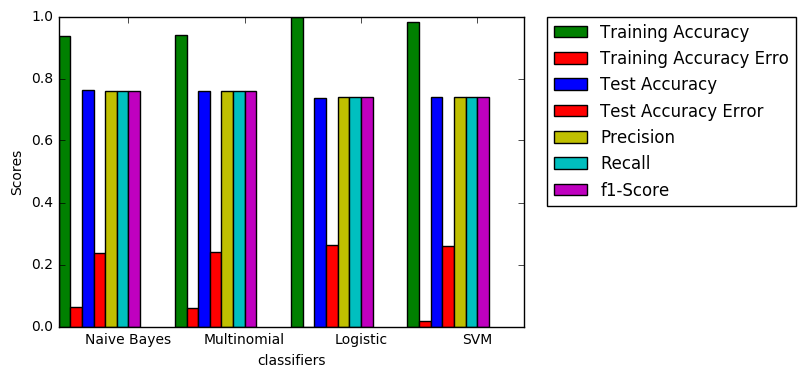

In [127]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

ax.set_ylabel('Scores')
ax.set_xlabel('classifiers')

train_accuracy = (0.938098, 0.940630, 1.000000, 0.983399)
train_error = (1 - 0.938098, 1 - 0.940630, 1 - 1.000000, 1 - 0.983399)
test_accuracy = (0.762173, 0.759921, 0.735998, 0.740501)
test_error = (1 - 0.762173, 1 - 0.759921, 1 - 0.735998, 1 - 0.740501)
precicion = (0.76, 0.76, 0.74, 0.74)
recall = (0.76, 0.76, 0.74, 0.74)
fscore = (0.76, 0.76, 0.74, 0.74)

ind = np.arange(4)
width = 0.1

train_accuracy_bar = ax.bar(ind, train_accuracy, width, color='g')
train_error_bar = ax.bar(ind + width, train_error, width, color='r')
test_accuracy_bar = ax.bar(ind + width*2, test_accuracy, width, color='b')
test_error_bar = ax.bar(ind + width*3, test_error, width, color='r')
precicion_bar = ax.bar(ind + width*4, precicion, width, color='y')
recall_bar = ax.bar(ind + width*5, recall, width, color='c')
fscore_bar = ax.bar(ind + width*6, fscore, width, color='m')

ax.set_xticks(ind + width*6)
ax.set_xticklabels(('Naive Bayes', 'Multinomial', 'Logistic', 'SVM'))

plt.legend((train_accuracy_bar[0], train_error_bar[0], test_accuracy_bar[0], test_error_bar[0], precicion_bar[0], recall_bar[0], fscore_bar[0]), ('Training Accuracy', 'Training Accuracy Erro', 'Test Accuracy', 'Test Accuracy Error', 'Precision', 'Recall', 'f1-Score'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Se puede observar que aunque el mejor desempeño fue obtenido por el bayesiano ingenuo en realidad no hay gran diferencia entre los desempeños de los distintos clasificadores.